In [1]:
import sys
base_dir = "D:/Thesis/Cobra/cobra/"
if base_dir not in sys.path:
    sys.path.append(base_dir)
from os.path import join
import pandas as pd
from utilities import utils
from stats_tools import vis as svis
import numpy as np
from access_sif_data import load_data_tools as ld

#import chart_studio.plotly as py
#import plotly.express as px
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import cufflinks as cf
#init_notebook_mode(connected=True)
#cf.go_offline()

import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline
plt.rcParams["figure.dpi"] = 40
plt.style.use('ggplot')
import importlib
importlib.reload(svis)

<module 'stats_tools.vis' from 'D:/Thesis/Cobra/cobra\\stats_tools\\vis.py'>

In [2]:
TE_k = 'EchoTime'
TR_k = 'RepetitionTime'
TI_k = 'InversionTime'
FA_k = 'FlipAngle'
SD_k = 'SeriesDescription'
PID_k = 'PatientID'
time_k = 'InstanceCreationTime'
date_k = 'InstanceCreationDate'
DT_k = 'DateTime'
SID_k = 'SeriesInstanceUID'
SS_k = 'ScanningSequence'
SV_k = 'SequenceVariant'
SN_k = 'SequenceName'
SO_k = 'ScanOptions'
ETL_k = 'EchoTrainLength'
MFS_k = 'MagneticFieldStrength'

In [3]:
fig_dir = join(base_dir, 'figs')
table_dir = join(base_dir, 'data/tables')
df = utils.load_scan_csv(join(table_dir, 'neg_pos.csv'))
presentation_dir = f"{fig_dir}/Presentation/Study_design/figs"

C:\Users\klein\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df.Sequence.unique

<bound method Series.unique of 0         flair
1            t2
2            t2
3         other
4            t1
          ...  
328484    flair
328485    flair
328486       t2
328487    other
328488    flair
Name: Sequence, Length: 328489, dtype: object>

# Patient Counts

## All

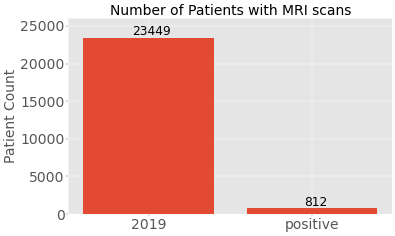

In [5]:
labels = ['2019', 'positive']
pos_mask = df.Positive==1
pos_pat_count = df[PID_k][pos_mask].nunique()
neg_pat_count = df[PID_k][~pos_mask].nunique()
counts = np.array([neg_pat_count, pos_pat_count])
kwargs={'xlabel':'', 'show':False, 'yrange':(0,26000),
        'ylabel':'Patient Count', 'title':'Number of Patients with MRI scans'}
fig, ax = svis.bar(labels, counts, kwargs=kwargs)
ax.text(1-.05, pos_pat_count+300, pos_pat_count, fontsize=22)
ax.text(0-.1, neg_pat_count+300, neg_pat_count, fontsize=22)
fig.savefig(f"{presentation_dir}/patient_count_all.png", dpi=150)

## Remove missing dates

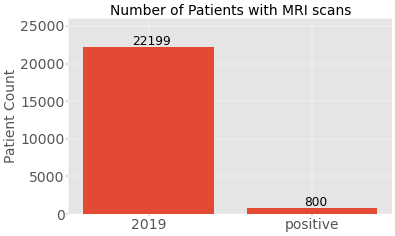

In [13]:
df = df[~df.InstanceCreationDate.isnull()]
pos_mask = df.Positive==1
pos_pat_count = df[PID_k][pos_mask].nunique()
neg_pat_count = df[PID_k][~pos_mask].nunique()
counts = np.array([neg_pat_count, pos_pat_count])
kwargs={'xlabel':'', 'show':False, 'yrange':(0,26000),
        'ylabel':'Patient Count', 'title':'Number of Patients with MRI scans'}
fig, ax = svis.bar(labels, counts, kwargs=kwargs)
ax.text(1-.05, pos_pat_count+300, pos_pat_count, fontsize=22)
ax.text(0-.1, neg_pat_count+300, neg_pat_count, fontsize=22)
fig.savefig(f"{presentation_dir}/patient_count_rm_dates.png", dpi=150)

In [14]:
print(f"There should be {df.PatientID.nunique()} patients with date")

There should be 22999 patients with date


In [34]:
#pred_seq = pd.read_csv("D:\Thesis\Cobra\cobra\data\share\sp\export\pred_seq.csv")
print(pred_seq.PatientID.nunique()) #some patients are missing
print(len(pred_seq))

22496
261000


In [30]:
df_sp_export = df.loc[:,['PatientID', 'SeriesInstanceUID','InstanceCreationDate', 'Sequence']]
df_sp_export.to_csv("D:\Thesis\Cobra\cobra\data\share\sp\export\pat_seq.csv", index=False, header=True)


In [32]:
df_sp_test = pd.read_csv("D:\Thesis\Cobra\cobra\data\share\sp\export\pat_seq.csv")
df_sp_test

,PatientID,SeriesInstanceUID,InstanceCreationDate,Sequence
0,003f2b55ad1db9d49b8cab9f9d0ad287,0655f969f74cccc710df6af1623f2b1f,2019-01-22,t2
1,003f2b55ad1db9d49b8cab9f9d0ad287,304e7dfefd8d6d594da87f729c01e9ac,2019-01-22,t2
2,003f2b55ad1db9d49b8cab9f9d0ad287,4194e0b87483476cb89419133dfd0a99,2019-01-22,other
3,003f2b55ad1db9d49b8cab9f9d0ad287,508473a999da22e86a920aef8f60ff80,2019-01-22,t1
4,003f2b55ad1db9d49b8cab9f9d0ad287,81c81aa7ab3d012d3e381609a6ba8921,2019-01-22,flair
...,...,...,...,...
274159,ff3975156e8c8b50c8cbade7cc1daa49,6c2fa3320bc67eb33fe3f7417554ae33,2020-08-04,flair
274160,ff3975156e8c8b50c8cbade7cc1daa49,903f4aae704b8d20a48355d1e34dd3e4,2020-08-04,flair
274161,ff3975156e8c8b50c8cbade7cc1daa49,93842a14fafaf6cb6a9ea27b301974aa,2020-08-04,t2
274162,ff3975156e8c8b50c8cbade7cc1daa49,ad053fa51244b63580b773687b52891f,2020-08-04,other


## Remove 'other' sequences

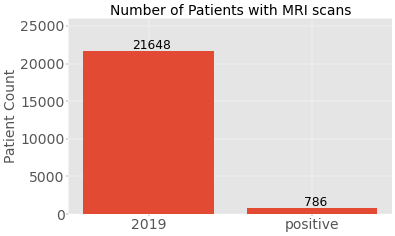

In [30]:
rel_seq = ['t2', 't1', 'flair', 'swi', 'dwi', 't2s']
df = df[df.Sequence.isin(rel_seq)]
labels = ['2019', 'positive']
pos_mask = df.Positive==1
pos_pat_count = df[PID_k][pos_mask].nunique()
neg_pat_count = df[PID_k][~pos_mask].nunique()
counts = np.array([neg_pat_count, pos_pat_count])
kwargs={'xlabel':'', 'show':False, 'yrange':(0,26000),
        'ylabel':'Patient Count', 'title':'Number of Patients with MRI scans'}
fig, ax = svis.bar(labels, counts, kwargs=kwargs)
ax.text(1-.05, pos_pat_count+300, pos_pat_count, fontsize=22)
ax.text(0-.1, neg_pat_count+300, neg_pat_count, fontsize=22)
fig.savefig(f"{presentation_dir}/patient_count_rm_dates_and_seq_other.png", dpi=150)